In [296]:
#
# Created on Fri Nov 24 2023 00:57:09
# Author: Mukai (Tom Notch) Yu
# Email: myual@connect.ust.hk
# Affiliation: Hong Kong University of Science and Technology
#
# Copyright Ⓒ 2023 Mukai (Tom Notch) Yu
#
import torch
from matplotlib import pyplot as plt

from utils.files import read_file, print_dict
from dataloader.feature_extractor import FeatureExtractor
from dataloader.perspective_warper import PerspectiveWarper
from dataloader.general import FeatureMatchingDataLoader
from dataloader.visualization import visualize_matches

In [297]:
config = read_file("./configs/default.yaml")
print_dict(config)

train: 
  epochs: 10.0
  learning_rate: 0.0001
  dataset: 
    batch_size: 6.0
    shuffle: True
    COCO: 
      path: ./COCO2014/train2014
      fraction: 0.001
      resize: [640.0, 480.0]
      fix_warp: False
    ScanNet: 
      path: ./ScanNet/train
      fraction: 0.001
      resize: [640.0, 480.0]
      fix_warp: False
eval: 
  output_dir: ./dump_match_pairs/
  eval_interval: 5.0
  dataset: 
    batch_size: 32.0
    shuffle: False
    COCO: 
      path: ./COCO2014/eval2014
      fraction: 0.001
      resize: [640.0, 480.0]
      fix_warp: True
    ScanNet: 
      path: ./ScanNet/eval
      fraction: 0.001
      resize: [640.0, 480.0]
      fix_warp: True
feature_extraction: 
  max_keypoints: 64.0
  descriptor_dim: 256.0
  extractor: 
    Superpoint: 
      keypoint_threshold: 0.005
      nms_radius: 4.0
      match_threshold: 0.2
      remove_borders: 4.0
      model_weight_path: ./models/weights/superpoint_v1.pth
perspective_warper: 
  max_warp_match_pixel_distance: 2.0
  homo

In [298]:
feature_extractor = FeatureExtractor(config["feature_extraction"])
perspective_warper = PerspectiveWarper(config["perspective_warper"])

dataloader = FeatureMatchingDataLoader(
    config["train"]["dataset"], feature_extractor, perspective_warper
)

Loaded SuperPoint model


In [299]:
batch = next(iter(dataloader))

number of ground truth match pairs: 24


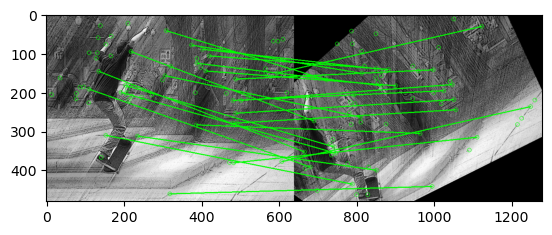

In [300]:
partial_assignment_matrix = batch["partial_assignment_matrix"]
print(
    "number of ground truth match pairs:",
    int(torch.sum(partial_assignment_matrix[0][:-1, :-1])),
)

plt.imshow(
    visualize_matches(
        batch["image_original"][0],
        batch["image_novel"][0],
        batch["keypoints_original"][0],
        batch["keypoints_novel"][0],
        batch["partial_assignment_matrix"][0],
    )
)